In [241]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
%matplotlib inline
from glob import glob
import random

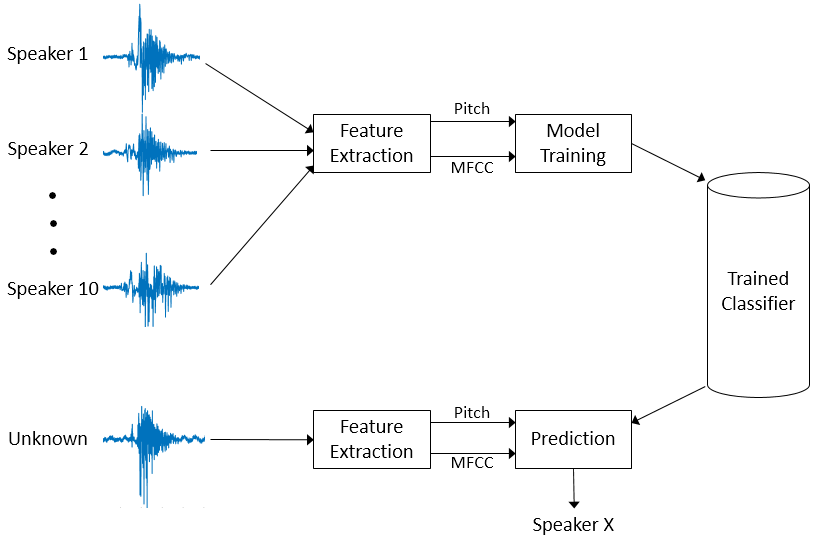

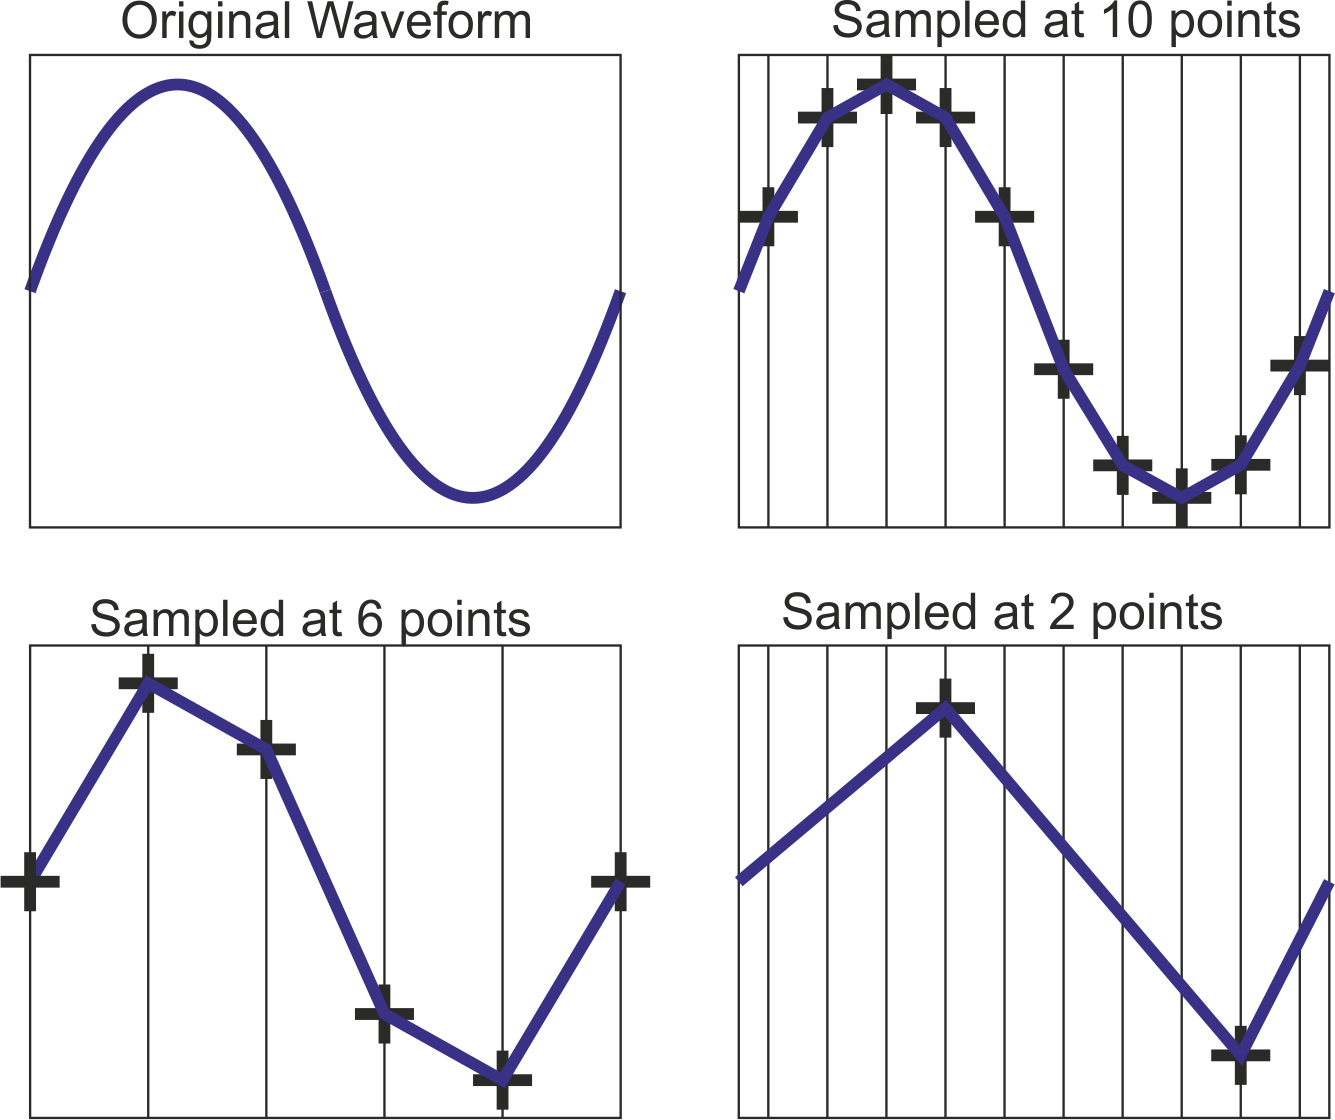

In [329]:
df ='/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/'
languages = os.listdir(df)

In [328]:
base_dir ='/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/'

for i in languages:
    print(i)

Punjabi
Tamil
Hindi
Bengali
Telugu
Kannada
Gujarati
Urdu
Marathi
Malayalam


In [351]:
for language in languages:
    language_dir = os.path.join(df, language)
    audio_files = glob(os.path.join(language_dir, '*.mp3'))
    print(len(audio_files))
    print(language)
    random_audio_file = random.choice(audio_files)

#     ipd.display(ipd.Audio(random_audio_file))


26229
Punjabi
24196
Tamil
25462
Hindi
27258
Bengali
23656
Telugu
22208
Kannada
26441
Gujarati
31960
Urdu
25379
Marathi
24044
Malayalam


In [245]:
bengali = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Bengali/"
gujrati = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/"
hindi = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/"
kannada = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Kannada/"
marathi = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi/'
urdu = '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu/'

work_dir = './'
len()

In [373]:
import os
import random

# Define the language directories
language_directories = [
    "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Bengali/",
    "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/",
    "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/",
    "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Kannada/",
    "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi/",
    "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu/"
]

# Initialize an empty list to store file paths
file_paths = []

# Define the number of samples to extract from each language
samples_per_language = 1000

# Iterate through each language directory and append file paths to the list
for language_directory in language_directories:
    files_in_language = os.listdir(language_directory)
    random.shuffle(files_in_language)  # Shuffle the files to get random samples
    selected_files = files_in_language[:samples_per_language]
    file_paths.extend([os.path.join(language_directory, file) for file in selected_files])
# Shuffle the list in-place
random.shuffle(file_paths)

# Print the list of file paths
print(file_paths[497:499],"  : ", file_paths[1492:1494])
print(len(file_paths))


['/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi/7067.mp3', '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/20672.mp3']   :  ['/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/5265.mp3', '/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Marathi/2445.mp3']
6000


In [246]:
filename = '100.mp3'
data, sample_rate = librosa.load(hindi+filename)
data.shape
sample_rate
#Listening to one of the files
ipd.Audio(hindi+filename)

In [247]:
filename[:-4]

'100'

In [248]:
train_size0=5000
train_size1=int(train_size0*0.2)
print(train_size0+train_size1)

6000


In [249]:
label = []
lang0 = []
for filename in os.listdir(bengali)[:train_size0]:
    label.append(filename[:-4])
    lang0.append('bengali')
for filename in os.listdir(gujrati)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('gujrati')
for filename in os.listdir(hindi)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('hindi')
for filename in os.listdir(kannada)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('kannada')
for filename in os.listdir(marathi)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('marathi')
for filename in os.listdir(urdu)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('urdu')

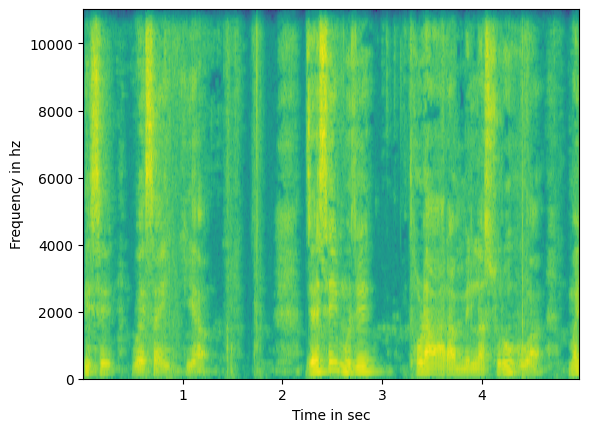

In [250]:
Pxx, freqs, bins, im = plt.specgram(data, Fs=sample_rate)

# add axis labels
plt.ylabel('Frequency in hz')
plt.xlabel('Time in sec')
plt.show()

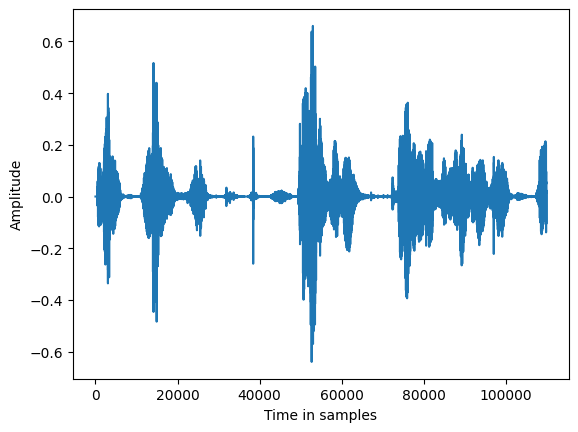

In [251]:
plt.plot(data)

# add axis labels
plt.ylabel('Amplitude')
plt.xlabel('Time in samples')
plt.show()

# # **Data Cleaning**

**Normalize**

In [428]:
def normalize_volume(audio):
    return librosa.util.normalize(audio)

In [429]:
def segment_audio(audio, segment_duration=5, sample_rate=22050):
    audio_duration = librosa.get_duration(y=audio, sr=sample_rate)
    segments = []
    for i in range(0, int(audio_duration), segment_duration):
        segment = audio[i * sample_rate : (i + segment_duration) * sample_rate]
        if len(segment) == segment_duration * sample_rate:
            segments.append(segment)
    return segments

  

In [257]:
filename[:-4]

'793'

In [258]:
train_size0=5000
train_size1=int(train_size0*0.2)
print(train_size0+train_size1)

6000


In [259]:
label = []
lang0 = []
for filename in os.listdir(bengali)[:train_size0]:
    label.append(filename[:-4])
    lang0.append('bengali')
for filename in os.listdir(gujrati)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('gujrati')
for filename in os.listdir(hindi)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('hindi')
for filename in os.listdir(kannada)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('kannada')
for filename in os.listdir(marathi)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('marathi')
for filename in os.listdir(urdu)[:train_size1]:
    label.append(filename[:-4])
    lang0.append('urdu')


In [260]:
len(label), len(lang0)

(10000, 10000)

In [261]:
label_dict = {
    'Label' :label,
    'Language':lang0
}

Label = pd.DataFrame(label_dict)
Label = Label.sample(frac=1).reset_index(drop=True)

Label['Language'].value_counts()

Language
bengali    5000
kannada    1000
hindi      1000
marathi    1000
gujrati    1000
urdu       1000
Name: count, dtype: int64

In [262]:
Label.head()

Label Language
0  22933  bengali
1  20041  kannada
2   5659  bengali
3  19099  kannada
4   7894    hindi

# # **Visualising**

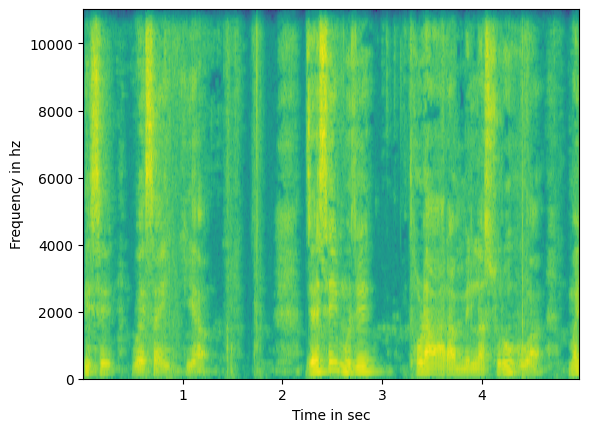

In [263]:
Pxx, freqs, bins, im = plt.specgram(data, Fs=sample_rate)

# add axis labels
plt.ylabel('Frequency in hz')
plt.xlabel('Time in sec')
plt.show()


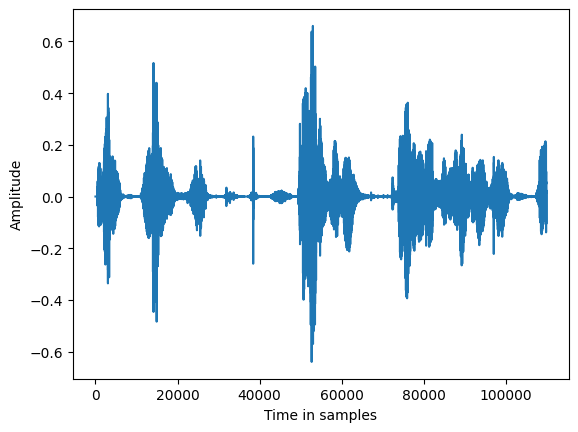

In [264]:
plt.plot(data)

# add axis labels
plt.ylabel('Amplitude')
plt.xlabel('Time in samples')
plt.show()

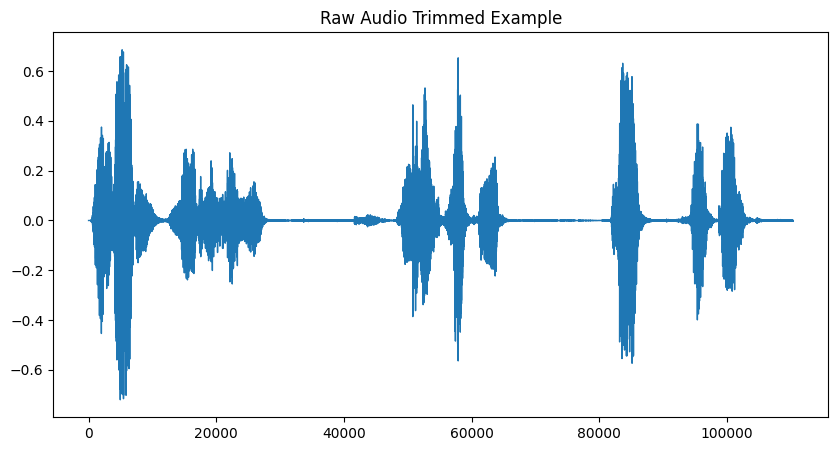

In [265]:
sample='/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/1.mp3'
y,z=librosa.load(sample)

pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example')
plt.show()

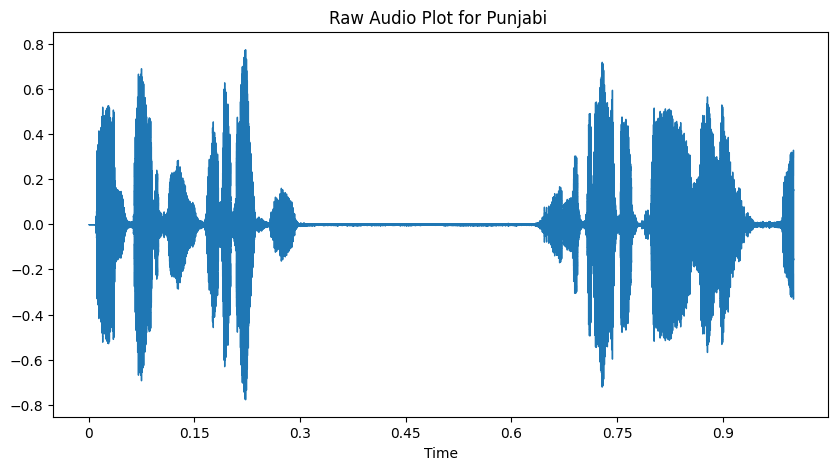

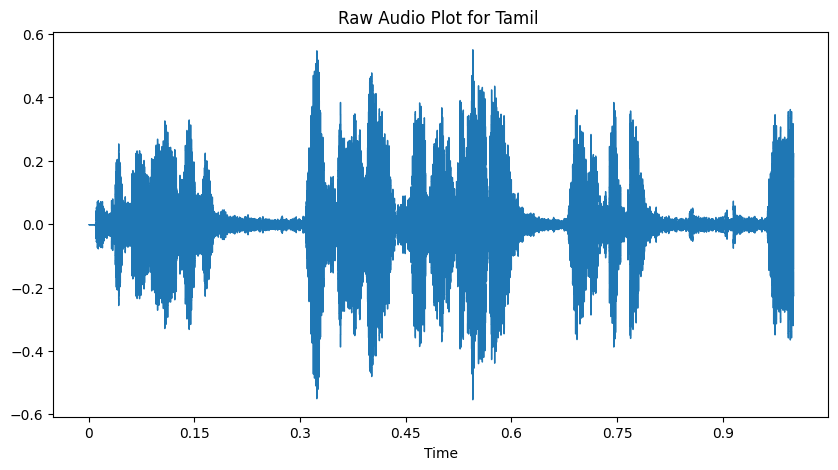

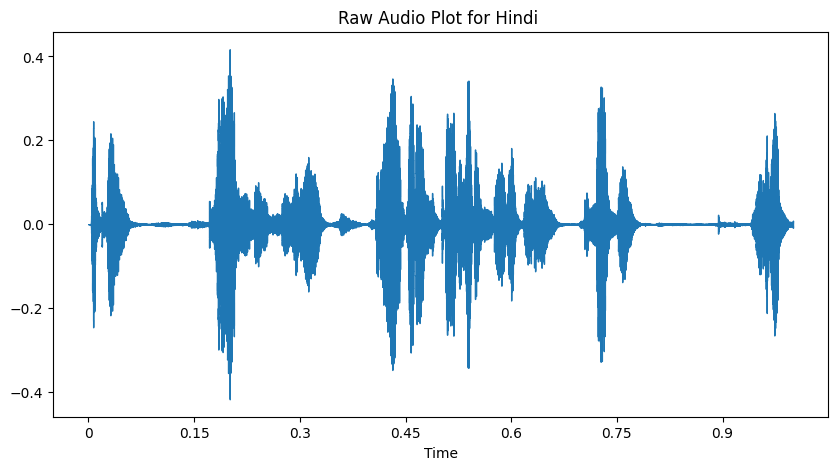

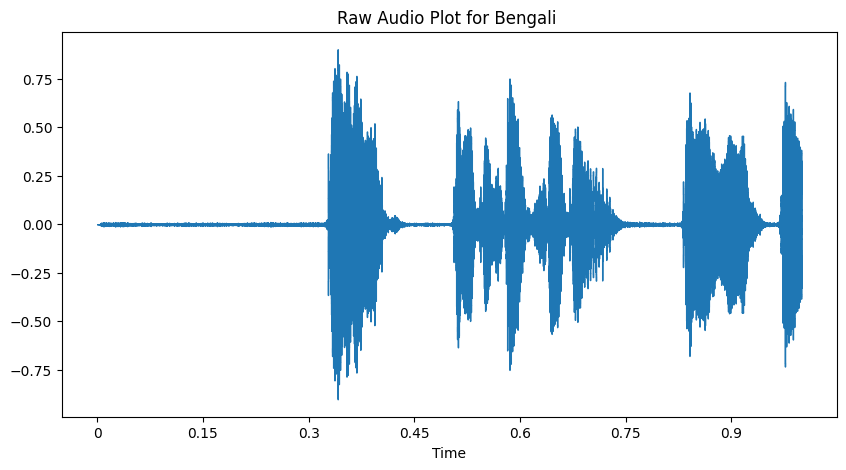

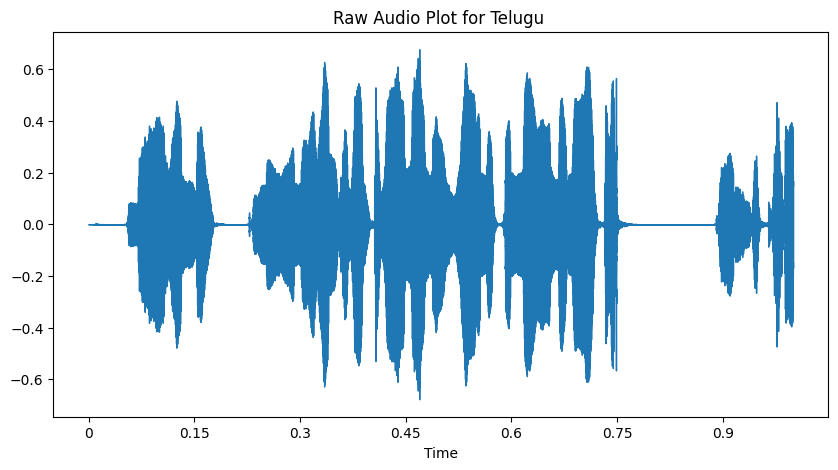

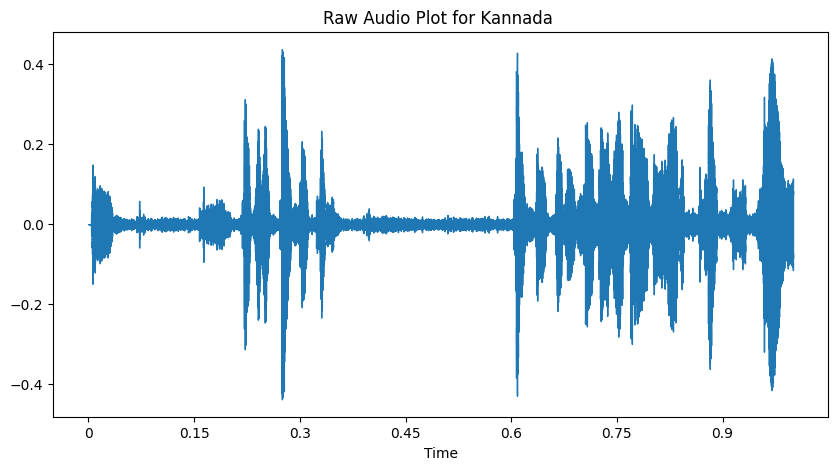

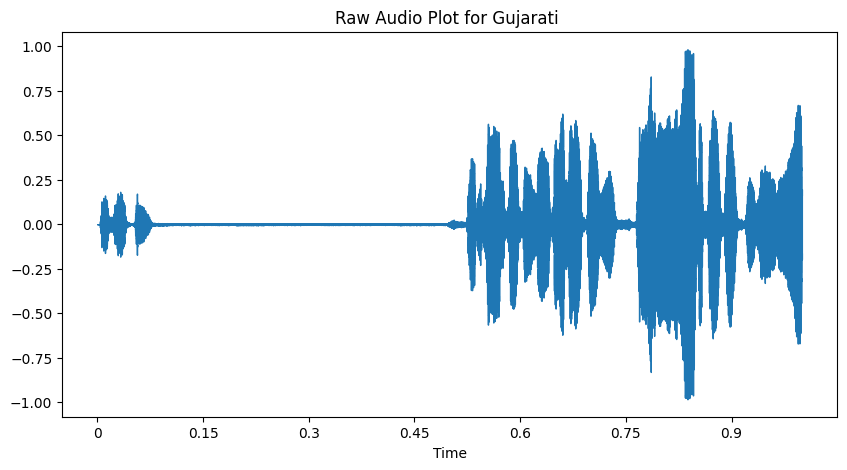

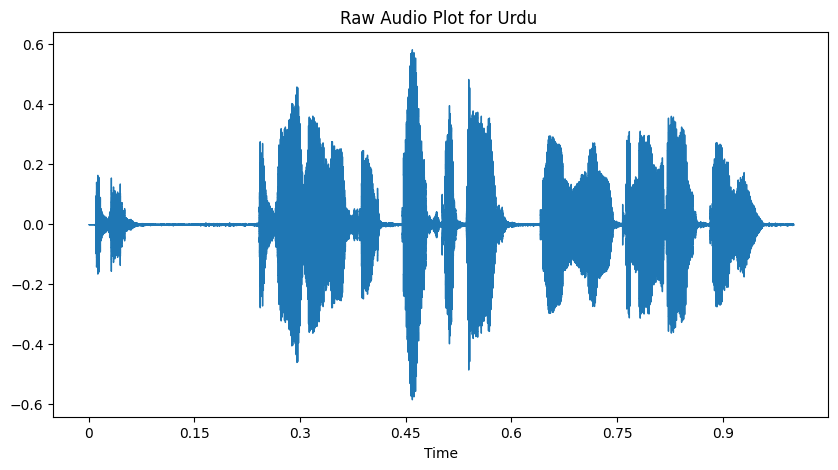

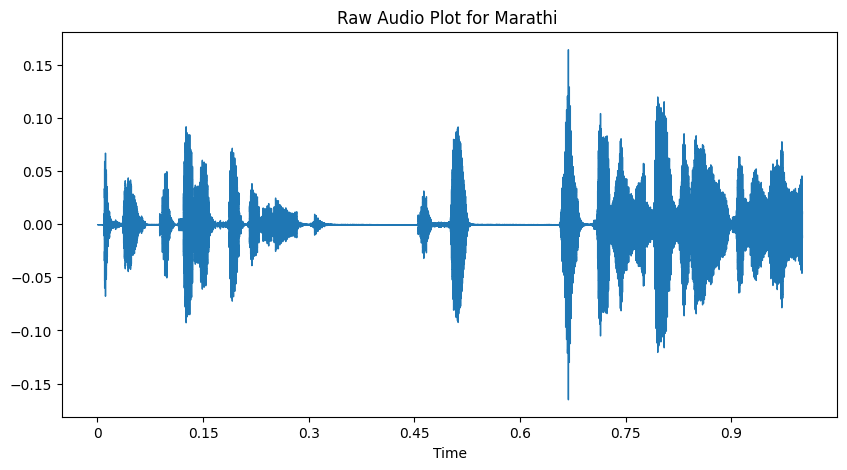

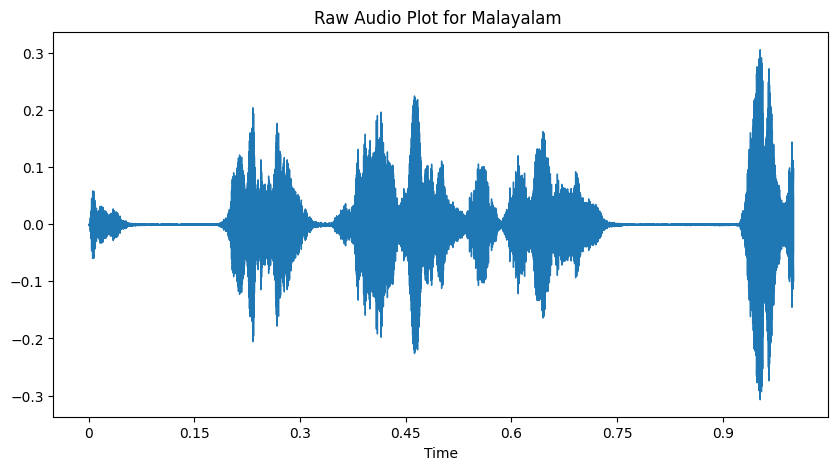

In [266]:
for language in languages:
    language_dir = os.path.join(df, language)
    a_f = glob(os.path.join(language_dir, '*.mp3'))
    random_a_f = random.choice(a_f)
    audio_data, _ = librosa.load(random_a_f, sr=None)
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(audio_data, sr=len(audio_data))
    plt.title(f'Raw Audio Plot for {language} ')
    plt.show()

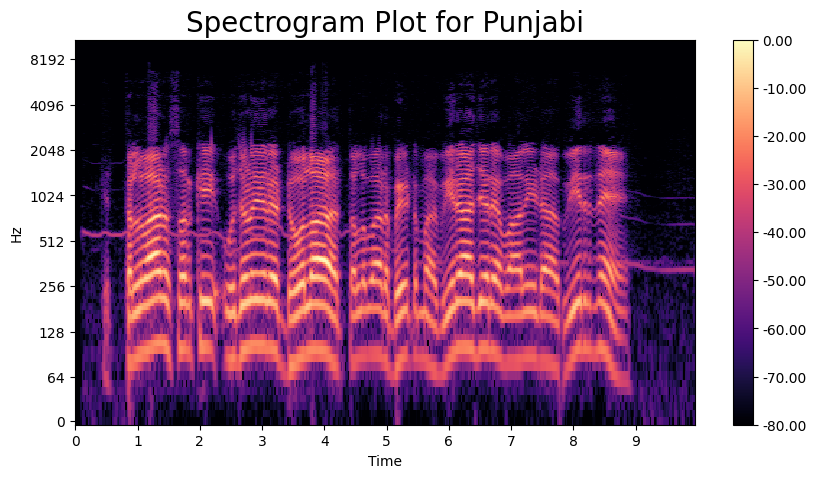

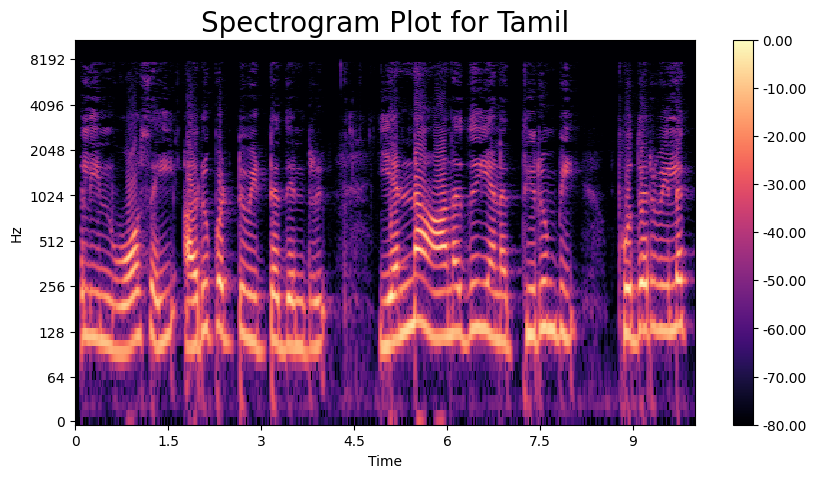

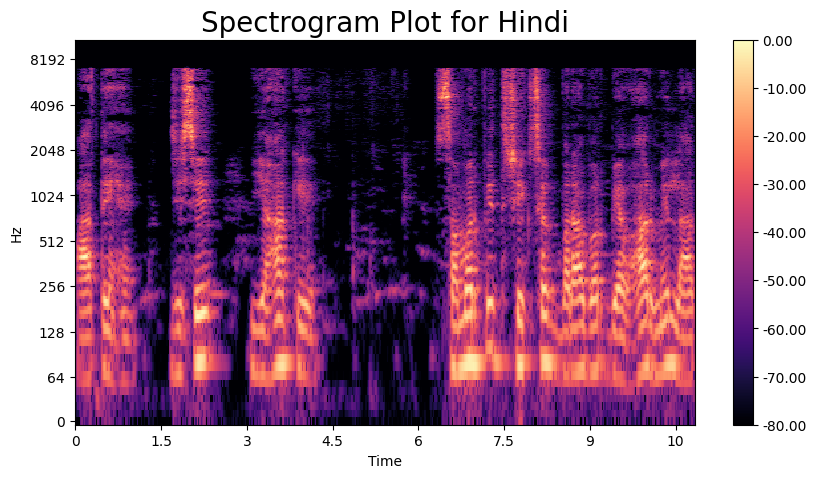

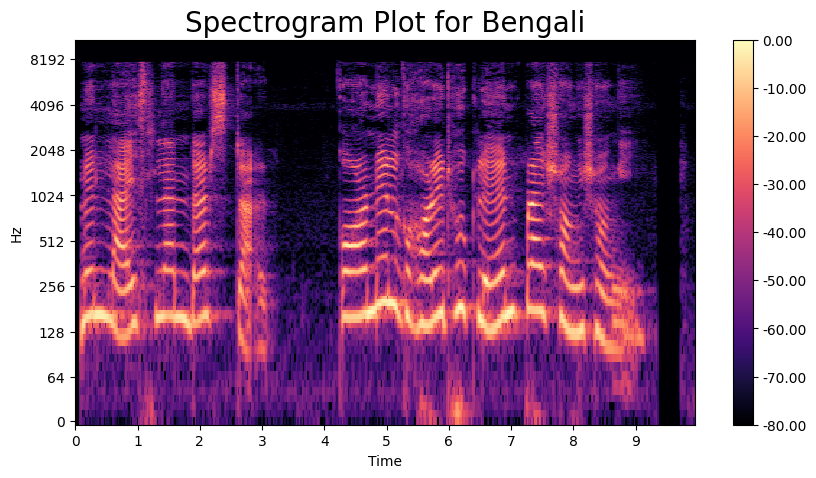

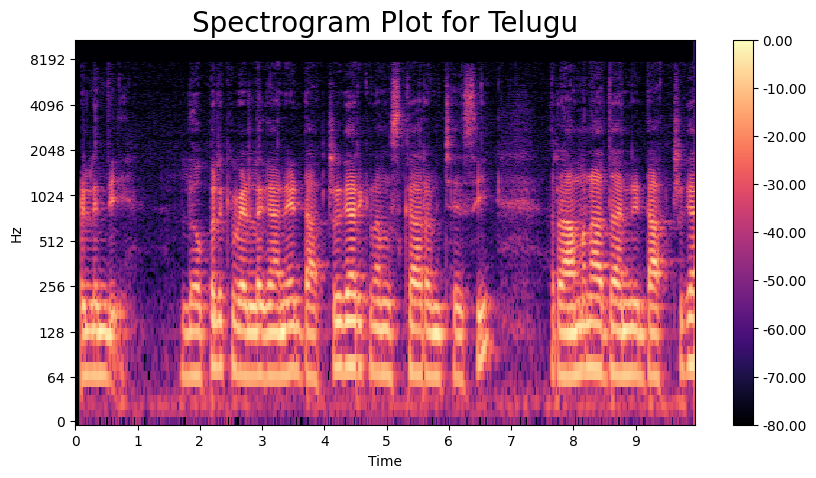

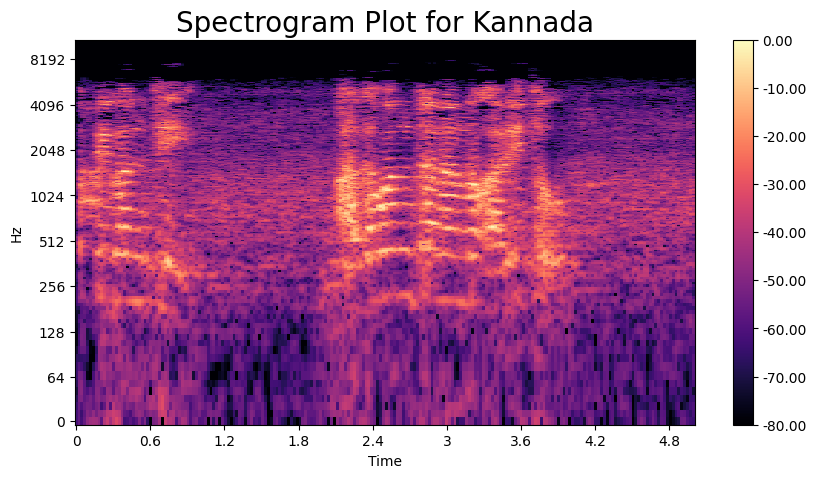

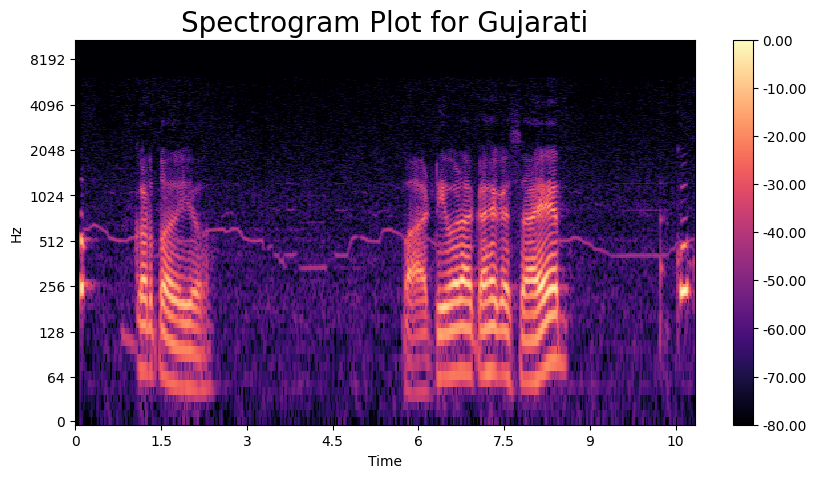

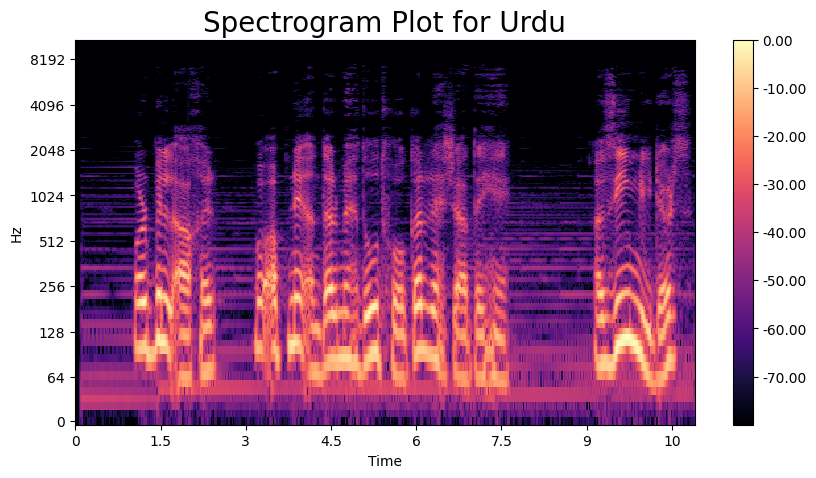

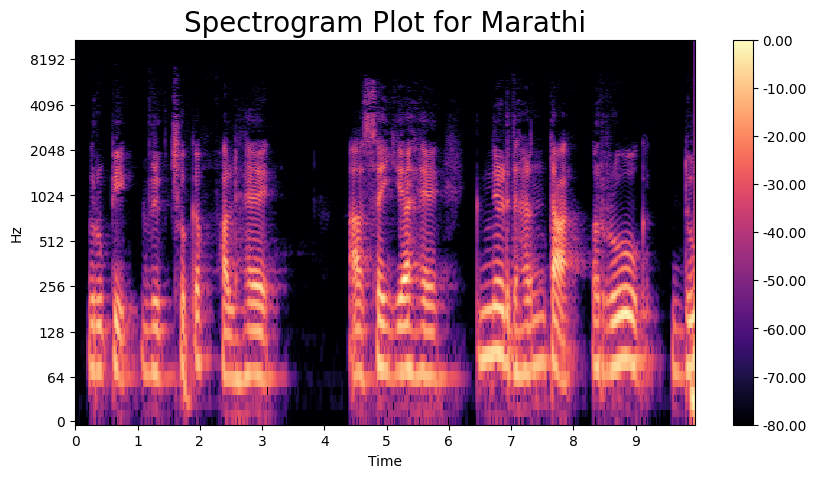

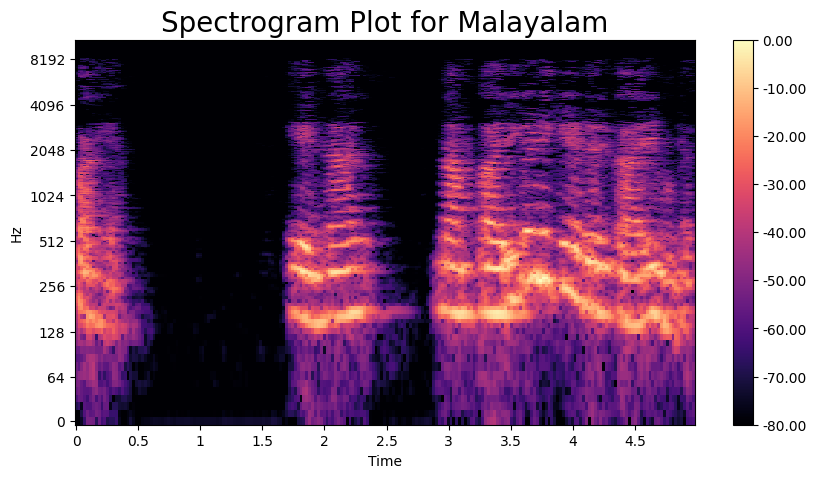

In [267]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
for language in languages:
    language_dir = os.path.join(df, language)
    a_f = glob(os.path.join(language_dir, '*.mp3'))
    random_a_f = random.choice(a_f)
    audio_data, _ = librosa.load(random_a_f, sr=None)
    
    # Computing the spectrogram
    D = librosa.stft(audio_data)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    # Ploting the spectrogram
    fig, ax = plt.subplots(figsize=(10, 5))
    img = librosa.display.specshow(S_db,
                                  x_axis='time',
                                  y_axis='log',
                                  ax=ax)
    ax.set_title(f'Spectrogram Plot for {language}', fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')
    plt.show()

**Data Labeling and Classification**

In [268]:
language_labels = {
    'Bengali': 0,
    'Gujarati': 1,
    'Hindi': 2,
    'Kannada': 3,
    'Marathi': 4,
    'Urdu': 5
}

Label['Label'] = Label['Language'].map(language_labels)

In [269]:
base_dir='/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/'

### Indian language or dialect

In [320]:
len(audio_files)

24044

In [376]:
import time
def MFCC_feature_extract(base_dir, File_name, start_index, end_index):
    MFCC_features = []
    Class = []

    for language in File_name:
        start_time = time.time()
        language_dir = os.path.join(base_dir, language)
        audio_files = glob(os.path.join(language_dir, '*.mp3'))
        print("running for : ", language)
        

        for audio_file in audio_files[start_index:end_index]:
            try:
                audio, sample_rate = librosa.load(audio_file)
                audio = normalize_volume(audio)  # Normalize the audio volume
                segmented_audio = segment_audio(audio)  # Segment the audio
                for segment in segmented_audio:
                    mfccs = librosa.feature.mfcc(y=segment, sr=sample_rate, n_mfcc=40)
                    mfccs_mean = np.mean(mfccs, axis=1)
                    MFCC_features.append(mfccs_mean)
                    Class.append(language)
            except Exception as e:
                print(f"Error processing {audio_file}: {e}")
        
        # checking for execution time
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Time: {execution_time} seconds")

    df = pd.DataFrame({'MFCC_Features': MFCC_features, 'Class': Class})
    return df

# Here I am taking 5000 smples from each class to reduce the time otherwise it's taking too much time to execute. 

df = MFCC_feature_extract(base_dir, languages, 0, 5000)




running for :  Punjabi
Time: 153.9482820034027 seconds
running for :  Tamil
Time: 154.22777724266052 seconds
running for :  Hindi
Time: 160.5927312374115 seconds
running for :  Bengali
Time: 157.8775656223297 seconds
running for :  Telugu
Time: 158.5491762161255 seconds
running for :  Kannada
Time: 137.7466151714325 seconds
running for :  Gujarati
Error processing /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu/5339.mp3: frames must be specified for non-seekable files
Time: 157.38495874404907 seconds
running for :  Marathi
Time: 156.74384593963623 seconds
running for :  Malayalam
Time: 146.73286271095276 seconds


In [282]:
# data frame of less data use it if needed
# df1=MFCC_feature_extract(base_dir, languages, 0, 1000)

running for :  Punjabi
Time: 30.369220972061157 seconds
running for :  Tamil
Time: 30.16884708404541 seconds
running for :  Hindi
Time: 31.301445722579956 seconds
running for :  Bengali
Time: 31.133309602737427 seconds
running for :  Telugu
Time: 30.914533138275146 seconds
running for :  Kannada
Time: 27.47538161277771 seconds
running for :  Gujarati
Time: 31.05330777168274 seconds
running for :  Urdu
Time: 31.781480312347412 seconds
running for :  Marathi
Time: 31.532413482666016 seconds
running for :  Malayalam
Time: 29.10884428024292 seconds


In [377]:
extracted_features= df.MFCC_Features
X= np.array(extracted_features.tolist())
y= df.Class
y= np.array(pd.get_dummies(y))


In [378]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0)

In [379]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report 

In [380]:
for units in [1,10,100]:
    clf= MLPClassifier(hidden_layer_sizes=[units],random_state=1).fit(X_train,y_train)
    print('for hidden layer= {}'.format(units))
    print(classification_report(y_test,clf.predict(X_test)))

for hidden layer= 1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       453
           1       0.00      0.00      0.00       478
           2       0.00      0.00      0.00       475
           3       0.00      0.00      0.00       490
           4       0.00      0.00      0.00       439
           5       0.00      0.00      0.00       479
           6       0.00      0.00      0.00       436
           7       0.00      0.00      0.00       476
           8       0.00      0.00      0.00       441
           9       0.00      0.00      0.00       446

   micro avg       0.00      0.00      0.00      4613
   macro avg       0.00      0.00      0.00      4613
weighted avg       0.00      0.00      0.00      4613
 samples avg       0.00      0.00      0.00      4613



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilay

for hidden layer= 10
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       453
           1       0.50      0.24      0.33       478
           2       0.90      0.87      0.89       475
           3       0.98      0.79      0.88       490
           4       0.92      0.88      0.90       439
           5       0.86      0.72      0.79       479
           6       0.49      0.58      0.54       436
           7       0.92      0.94      0.93       476
           8       0.86      0.71      0.78       441
           9       0.84      0.66      0.74       446

   micro avg       0.83      0.72      0.77      4613
   macro avg       0.82      0.72      0.76      4613
weighted avg       0.82      0.72      0.76      4613
 samples avg       0.68      0.72      0.69      4613

for hidden layer= 100
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       453
           1       0.51      0.62  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [381]:
model= MLPClassifier(hidden_layer_sizes= 100,random_state=1).fit(X_train,y_train)

In [382]:


# test file
df2 = MFCC_feature_extract(base_dir, languages, 1100, 1500)


running for :  Punjabi
Time: 12.214125394821167 seconds
running for :  Tamil
Time: 12.914615154266357 seconds
running for :  Hindi
Time: 12.642512083053589 seconds
running for :  Bengali
Time: 13.622744083404541 seconds
running for :  Telugu
Time: 12.47655725479126 seconds
running for :  Kannada
Time: 11.095774173736572 seconds
running for :  Gujarati
Time: 12.347571611404419 seconds
running for :  Urdu
Time: 12.578450202941895 seconds
running for :  Marathi
Time: 12.813042163848877 seconds
running for :  Malayalam
Time: 11.548438310623169 seconds


In [383]:
from sklearn.metrics import accuracy_score
X1= np.array(df2.MFCC_Features.tolist())
y2= df2.Class
y2= np.array(pd.get_dummies(y2))
predicted_class= model.predict(X1)
print('Test set Accuracy:{}'.format(accuracy_score(y2,predicted_class)))

Test set Accuracy:0.8209666439754936


In [384]:
from sklearn.metrics import confusion_matrix
import seaborn as sns





y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


y_test_labels = np.argmax(y_test, axis=1)


confusion_mtx = confusion_matrix(y_test_labels, y_pred_classes)

print(confusion_mtx)
confusion_df = pd.DataFrame(confusion_mtx)


[[449   0   3   0   0   0   0   1   0   0]
 [113 295   1   0   0   1  61   1   3   3]
 [ 26   0 448   0   0   0   0   0   0   1]
 [ 30   2   0 444   4   0   0   1   3   6]
 [ 20   1   1   5 409   1   0   1   0   1]
 [ 56   1   3   1   1 411   1   0   2   3]
 [106 278   0   0   0   0  50   0   0   2]
 [  8   0   2   0   1   0   0 465   0   0]
 [ 23   0   1   0   1   0   0   6 410   0]
 [ 22   0   0   1   7   1   1   1   0 413]]


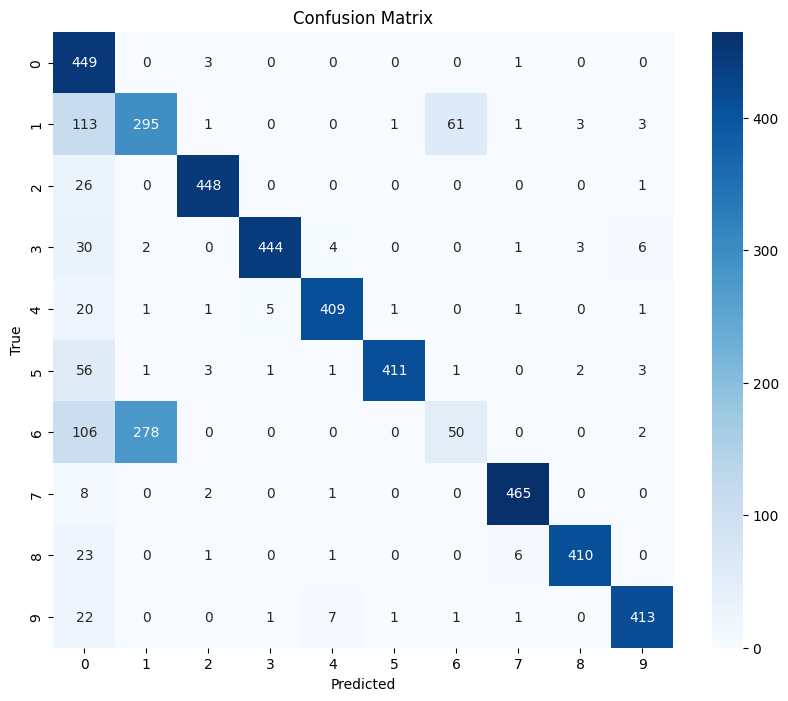

In [385]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Project Progress and Challenges
### Initial Accuracy:
#### Initially, the model achieved an accuracy of 52% before data cleaning. This prompted a closer examination of the dataset to address issues that could potentially hinder the model's performance.

### Improved Accuracy after Data Cleaning:
#### After thorough data cleaning, the accuracy of the model significantly improved, reaching 82%. This underscores the importance of data quality in the success of machine learning models.

### Transition to Audio Data:
#### In this project, I faced the challenge of working with audio data, a departure from my usual focus on text and image data. To overcome this, I dedicated time to learning about audio data, understanding its unique characteristics, and implementing the dataset accordingly

### Time and Learning:
#### The data cleaning process proved time-consuming, prompting me to utilize this duration productively by waiting for the process and simultaneously learning other relevant concepts and techniques. This multitasking approach enhanced the efficiency of the project timeline.

### Debugging Code:
#### At times, I encountered issues during the coding phase. To address these challenges, I engaged in rigorous debugging sessions. By identifying and understanding the problems, I was able to implement effective solutions, ensuring the code's robustness and functionality.

In [280]:
# a